<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_15_Matplotlib Scatter Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟨 Median Yearly Salary vs. Job Count (2.15.1)

In [8]:
title_stats = df.groupby('job_title_short').agg(
    median_salary = ('salary_year_avg', 'median'),
    job_count = ('job_title_short', 'count')
).dropna()

In [9]:
titles_stats = title_stats.sort_values(by='job_count', ascending=False)

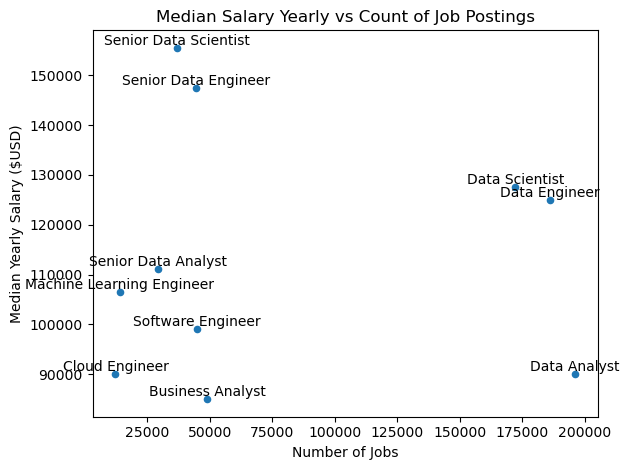

In [12]:
titles_stats.plot(kind='scatter', x='job_count', y='median_salary')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Median Salary Yearly vs Count of Job Postings')

for i, txt in enumerate(titles_stats.index):
    plt.text(titles_stats['job_count'].iloc[i], titles_stats['median_salary'].iloc[i], txt, ha='center', va='bottom')

plt.tight_layout()
plt.show()

---

## 🟨 Top 7 Countries by Median Yearly Salary vs Job Count  (2.15.2)

In [22]:
top_country = df.groupby('job_country').agg(
    median_yearly_salary = ('salary_year_avg', 'median'),
    job_count = ('job_country', 'count')
).dropna()

In [23]:
top_7_country = top_country.sort_values(by='job_count', ascending=False).head(7)

In [24]:
top_7_country

,median_yearly_salary,job_count
job_country,,
United States,119187.5,206292
India,111175.0,51088
United Kingdom,104668.0,40375
France,97444.0,39922
Germany,111175.0,27694
Spain,98391.5,25100
Singapore,100500.0,23696


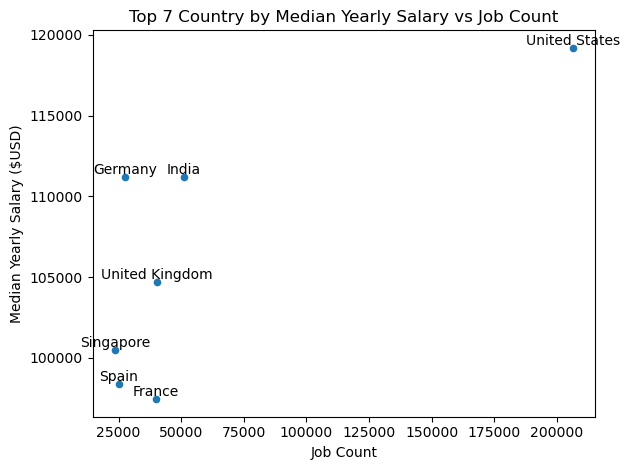

In [25]:
top_7_country.plot(kind='scatter', x='job_count', y='median_yearly_salary')

for i, txt in enumerate(top_7_country.index):
    plt.text(top_7_country['job_count'].iloc[i], top_7_country['median_yearly_salary'].iloc[i], txt, ha='center', va='bottom')

plt.title('Top 7 Country by Median Yearly Salary vs Job Count')
plt.xlabel('Job Count')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()
plt.show()

---

## 🟥 Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3)

In [26]:
# Code Needed
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

In [59]:
df_target_job_titles = df[(df['job_title_short'] == 'Data Analyst') | (df['job_title_short'] == 'Data Scientist') | (df['job_title_short'] == 'Data Engineer')]

In [60]:
df_target_job_titles = df_target_job_titles[df_target_job_titles['job_country'] == 'United States']

In [61]:
df_target_job_titles = df_target_job_titles[(df_target_job_titles['job_schedule_type'] == 'Full-time') | (df_target_job_titles['job_schedule_type'] == 'Contractor')]


In [62]:
df_target_job_titles.dropna(subset='salary_year_avg', inplace=True)

In [63]:
stats = df_target_job_titles.groupby(['job_schedule_type', 'job_title_short']).agg(
    mean_salary_year_avg=('salary_year_avg', 'mean'),
    job_count=('job_title_short', 'count')
).dropna()

In [64]:
stats.reset_index(inplace=True)

In [65]:
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

In [66]:
stats

,job_schedule_type,job_title_short,mean_salary_year_avg,job_count,job_title_type
0,Contractor,Data Analyst,87027.197142,111,Data Analyst - Contractor
1,Contractor,Data Engineer,117772.326225,74,Data Engineer - Contractor
2,Contractor,Data Scientist,118568.074155,61,Data Scientist - Contractor
3,Full-time,Data Analyst,95072.545202,4097,Data Analyst - Full-time
4,Full-time,Data Engineer,133804.432239,2759,Data Engineer - Full-time
5,Full-time,Data Scientist,140848.379828,4325,Data Scientist - Full-time


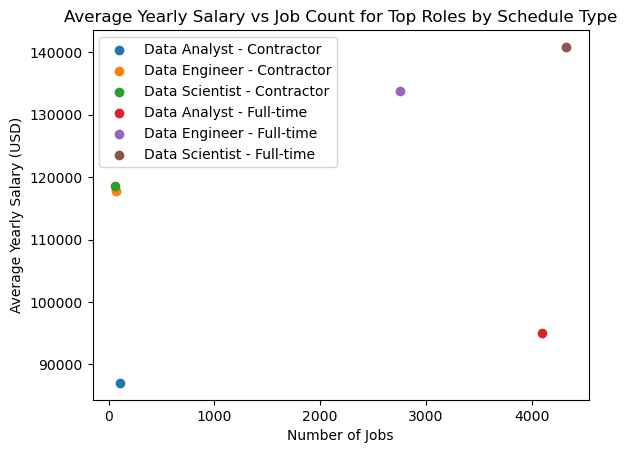

In [67]:
for job_title_type in stats['job_title_type'].unique():
    subset = stats[stats['job_title_type'] == job_title_type]
    plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

---

### another_way

In [ ]:
# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
 (df['job_country'] == 'United States') &
 (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
 (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
 mean_salary_year_avg=('salary_year_avg', 'mean'),
 job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
 subset = stats[stats['job_title_type'] == job_title_type]
 plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()